<a href="https://colab.research.google.com/github/GuilhermeFogolin/Python-Dados-Machine-Learning/blob/main/Tratamento_Projeto02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Análise dos dados sobre a Síndrome Respiratória Aguda Grave (SRAG)**

Este projeto analisa os dados referentes aos casos de síndrome respiratória aguda no estado de São Paulo do período de dezembro de 2019 à julho de 2020.

Os dados estão disponíveis nos sites:

https://www.seade.gov.br/coronavirus/#

https://github.com/seade-R/dados-covid-sp

https://www.seade.gov.br/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importação dos Dados**

In [2]:
import numpy as np
import pandas as pd

In [3]:
srag_sp = pd.read_csv('/content/drive/MyDrive/Python_Dados_Machine_Learning/SRAG_2020.csv',
                    sep=';', encoding='utf-8')

/tmp/ipython-input-3-2194773891.py:1: DtypeWarning: Columns (15,48,50,51,52,55,86,92,94,106,108,115,117,118,119) have mixed types. Specify dtype option on import or set low_memory=False.
  srag_sp = pd.read_csv('/content/drive/MyDrive/Python_Dados_Machine_Learning/SRAG_2020.csv',


In [4]:
srag_sp.head()

,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,...,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT
0,12/30/2019,F,52,3,3052,BRASIL,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,...,1,12/29/2019,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,CATANDUVA,351110,HOSP ESCOLA EMILIO CARLOS CATANDUVA,2089335
1,1/2/2020,M,7,2,2007,BRASIL,1,SP,GVE I CAPITAL,1331.0,...,1,12/30/2019,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSP MUN JABAQUARA ARTUR RIBEIRO DE SABOYA,2081970
2,12/29/2019,F,22,3,3022,BRASIL,1,SP,GVE XVII CAMPINAS,1342.0,...,1,12/29/2019,1,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL RENASCENCA CAMPINAS,7044666
3,12/31/2019,M,75,3,3075,BRASIL,1,SP,GVE VII SANTO ANDRE,1332.0,...,1,12/31/2019,1,SP,GVE VII SANTO ANDRE,1332.0,SAO BERNARDO DO CAMPO,354870,UPA PAULICEIA TABOAO,6821197
4,1/2/2020,F,1,3,3001,BRASIL,1,SP,GVE XIII ASSIS,1338.0,...,1,12/31/2019,1,SP,GVE XIII ASSIS,1338.0,ASSIS,350400,HOSPITAL REGIONAL DE ASSIS,2083094


In [5]:
srag_sp.shape

(106651, 133)

## **Tratamento dos Dados**

In [6]:
srag_sp.head(2)

,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,...,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT
0,12/30/2019,F,52,3,3052,BRASIL,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,...,1,12/29/2019,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,CATANDUVA,351110,HOSP ESCOLA EMILIO CARLOS CATANDUVA,2089335
1,1/2/2020,M,7,2,2007,BRASIL,1,SP,GVE I CAPITAL,1331.0,...,1,12/30/2019,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSP MUN JABAQUARA ARTUR RIBEIRO DE SABOYA,2081970


In [7]:
srag_sp.shape

(106651, 133)

**EXCLUINDO VARIÁVEIS**

In [ ]:
lista = list(range(50,133))
lista

In [9]:
srag_mod = srag_sp.drop(srag_sp.columns[lista],axis=1)

In [10]:
srag_mod.head(2)

,DT_NOTIFIC,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,...,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA
0,12/30/2019,F,52,3,3052,BRASIL,1,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,...,2.0,NaN,NaN,2.0,NaN,1.0,5/10/2019,NaN,NaN,NaN
1,1/2/2020,M,7,2,2007,BRASIL,1,SP,GVE I CAPITAL,1331.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [13]:
srag_mod.shape

(106651, 43)

In [12]:
srag_mod.drop(columns=['COD_IDADE','ID_PAIS','CO_PAIS','SG_UF','ID_RG_RESI','CO_RG_RESI','CO_MUN_RES'],inplace=True)

**Renomeando Variáveis**

In [14]:
srag_mod = srag_mod.rename(columns={'DT_NOTIFIC': 'data', 'CS_SEXO': 'sexo',
                                  'NU_IDADE_N': 'idade','CS_RACA': 'raca'})

In [15]:
srag_mod.head(3)

,data,sexo,idade,TP_IDADE,ID_MN_RESI,CS_ZONA,CS_GESTANT,raca,CS_ETINIA,CS_ESCOL_N,...,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA
0,12/30/2019,F,52,3,CATANDUVA,1.0,9,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,NaN,1.0,5/10/2019,NaN,NaN,NaN
1,1/2/2020,M,7,2,SAO PAULO,1.0,6,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,12/29/2019,F,22,3,CAMPINAS,1.0,1,9.0,NaN,9.0,...,2.0,2.0,NaN,2.0,NaN,1.0,8/17/2019,NaN,NaN,NaN


**ANALISANDO OS TIPOS DE VARIÁVEIS**

In [21]:
srag_mod.dtypes

,0
data,datetime64[ns]
sexo,object
idade,int64
TP_IDADE,int64
ID_MN_RESI,object
CS_ZONA,float64
CS_GESTANT,int64
raca,float64
CS_ETINIA,object
CS_ESCOL_N,float64


In [20]:
srag_mod['data'] = srag_mod['data'].astype('datetime64[ns]')

**Analisando valores missing (NAN)**

In [26]:
srag_mod.isnull().sum()

,0
data,0
sexo,0
idade,0
TP_IDADE,0
ID_MN_RESI,11
CS_ZONA,13868
CS_GESTANT,0
raca,0
CS_ETINIA,106635
CS_ESCOL_N,31001


**Contagem das classificações de raças**

In [25]:
srag_mod['raca'].value_counts().sort_index()

,count
raca,
1.0,45667
2.0,5518
3.0,1165
4.0,19775
5.0,86
9.0,34440


In [24]:
# Preenchendo valores missing com o número 9 (ignorado)
srag_mod['raca'].fillna(9, inplace=True)

/tmp/ipython-input-24-147825761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  srag_mod['raca'].fillna(9, inplace=True)


In [27]:
srag_mod['raca'].value_counts().sort_index()

,count
raca,
1.0,45667
2.0,5518
3.0,1165
4.0,19775
5.0,86
9.0,34440


**Contagem das classificações de CS_ZONA**

In [28]:
srag_mod['CS_ZONA'].value_counts().sort_index()

,count
CS_ZONA,
1.0,91232
2.0,1362
3.0,189


In [29]:
# Preenchendo valores missing com o número 9 (ignorado)
srag_mod['CS_ZONA'].fillna(9, inplace=True)

/tmp/ipython-input-29-3353776090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  srag_mod['CS_ZONA'].fillna(9, inplace=True)


In [30]:
srag_mod['CS_ZONA'].value_counts().sort_index()

,count
CS_ZONA,
1.0,91232
2.0,1362
3.0,189
9.0,13868


**Substituindo as classificações numéricas por palavras**

In [31]:
srag_mod['raca']=srag_mod['raca'].replace({1:'branca',
                                           2:'preta',
                                           3:'amarela',
                                           4:'parda',
                                           5:'indígena',
                                           9:'ignorado'})

In [33]:
srag_mod['raca'].value_counts()

,count
raca,
branca,45667
ignorado,34440
parda,19775
preta,5518
amarela,1165
indígena,86


In [34]:
srag_mod['CS_ZONA']=srag_mod['CS_ZONA'].replace({1:'urbana',
                                                 2:'rural',
                                                 3:'periurbana',
                                                 9:'ignorado'})

In [35]:
srag_mod['CS_ZONA'].value_counts().sort_index()

,count
CS_ZONA,
ignorado,13868
periurbana,189
rural,1362
urbana,91232


## **Gráfico de barras**

###Matplotlib

In [36]:
import matplotlib.pyplot as plt

In [37]:
graf_barras = srag_mod['sexo'].value_counts()
graf_barras

,count
sexo,
M,57629
F,49002
I,20


In [38]:
graf_barras.index

Index(['M', 'F', 'I'], dtype='object', name='sexo')

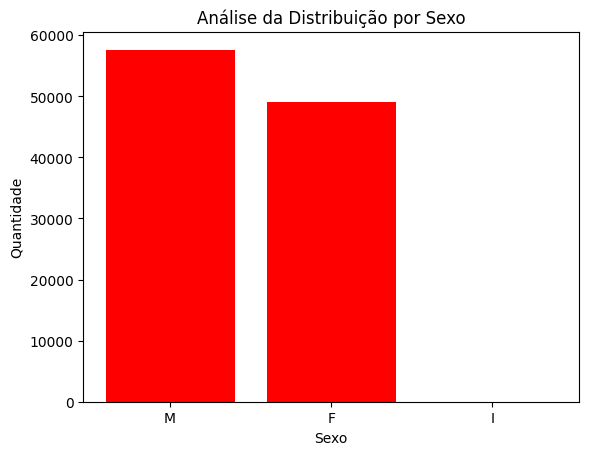

In [39]:
plt.bar(graf_barras.index, graf_barras, color = 'red')
plt.title('Análise da Distribuição por Sexo')
plt.ylabel('Quantidade')
plt.xlabel('Sexo')
plt.show()

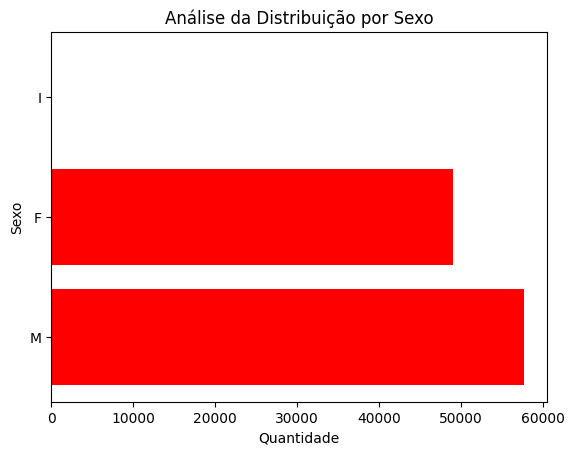

In [40]:
plt.barh(graf_barras.index, graf_barras, color = 'red')
plt.title('Análise da Distribuição por Sexo')
plt.xlabel('Quantidade')
plt.ylabel('Sexo')
plt.show()

### Seaborn

In [ ]:
import seaborn as sns

In [ ]:
sns.countplot(x='sexo', data=srag_mod);

In [ ]:
sns.countplot(y = 'sexo', data=srag_mod);

In [ ]:
fig, ax = plt.subplots(figsize=(16,14))
sns.countplot(x = 'raca', data=srag_mod)
ax.set_title("Análise da Distribuição por Raça", fontdict={'fontsize':25})
ax.set_xlabel('Raça', fontdict={'fontsize':18})
ax.set_ylabel('Quantidade', fontdict={'fontsize':18});

## **Box Plot**

### Plotly

In [ ]:
import plotly.express as px

Box Plot para idade em anos

In [ ]:
srag_mod['TP_IDADE'].value_counts().sort_index()

In [ ]:
srag_mod['idade'].value_counts().sort_index()

In [ ]:
srag_mod.idade.describe()

In [ ]:
srag_mod.idade.mode()

In [ ]:
srag_mod.loc[srag_mod['TP_IDADE'] == 1, 'idade'] = 0

In [ ]:
srag_mod.loc[srag_mod['TP_IDADE'] == 2, 'idade'] = 0

In [ ]:
srag_mod.idade.describe()

In [ ]:
box = px.box(srag_mod, y='idade')
box.show()

In [ ]:
srag_sem_outliers = srag_mod.loc[srag_mod.idade < 118]

In [ ]:
srag_sem_outliers.idade.describe()

In [ ]:
box = px.box(srag_sem_outliers, y='idade')
box.show()

In [ ]:
box = px.box(srag_sem_outliers,x='sexo', y='idade')
box.show()

In [ ]:
box = px.box(srag_sem_outliers,x='raca', y='idade')
box.show()

### **Seaborn**

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(y='idade', data=srag_mod,color='red');

In [ ]:
sns.boxplot(x='idade', data=srag_sem_outliers,color='green');

In [ ]:
sns.boxplot(x='sexo',y='idade', data=srag_mod);

In [ ]:
sns.boxplot(x='CS_ZONA',y='idade', data=srag_mod);

In [ ]:
fig, ax = plt.subplots(figsize=(16,14))
sns.boxplot(x='CS_ZONA',y='idade', hue="raca", data=srag_mod);

### **Matplotlib**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.boxplot(srag_mod.idade)
plt.show()

In [ ]:
plt.boxplot(srag_sem_outliers.idade)
plt.title('Box Plot da idade')
plt.ylabel('idade')
plt.show()

In [ ]:
plt.boxplot(srag_sem_outliers.idade, vert=False)
plt.title('Box Plot da idade')
plt.ylabel('idade')
plt.show()

## **Histograma**

### **Plotly**

In [ ]:
import plotly.express as px

In [ ]:
hist1 =  px.histogram (srag_mod,  x = "idade", nbins=60)
hist1.update_layout(width=800,height=500,title_text='Distribuição das idades')
hist1.show()

In [ ]:
hist1 =  px.histogram (srag_mod,  x = "idade", nbins=60, color='sexo')
hist1.update_layout(width=800,height=500,title_text='Distribuição das idades')
hist1.show()

In [ ]:
hist1 =  px.histogram (srag_mod,  x = "idade", nbins=60, color = 'raca')
hist1.update_layout(width=800,height=500,title_text='Distribuição das idades')
hist1.show()

In [ ]:
hist1 =  px.histogram (srag_mod,  x = "idade", nbins=60, color='CS_ZONA')
hist1.update_layout(width=800,height=500,title_text='Distribuição das idades')
hist1.show()

### **Análise da Normalidade - Gráfico QQPlot**

In [ ]:
srag_mod.idade.describe()

In [ ]:
srag_mod.idade.mode()

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
stats.probplot(srag_mod['idade'], dist="norm", plot=plt)
plt.title("Análise Normalidade")
plt.show()

Teste de Shapiro-Wilk

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [ ]:
stats.shapiro(srag_mod.idade)

O teste de Shapiro_Wilk não se aplica a dados maiores que 5000.

Teste Lilliefors (Kolmogorov-Smirnov)

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(srag_mod.idade, dist = 'norm')
print ('Estatística do teste (D) =', round(estatistica,2))
print ('p_valor =', p)

### **Seaborn**

In [ ]:
import seaborn as sns

In [ ]:
sns.histplot(srag_mod, x='idade', bins=30, color="orange", kde=True, stat="count");
ax.set_title("Distribuição SRAG por idade ", fontdict={'fontsize':20});
# ax.set_xlabel('Idade', fontdict={'fontsize':15})
# ax.set_ylabel('Quantidade', fontdict={'fontsize':15});


### **Matplotlib**

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.hist(srag_mod.idade,color='red',density=False,bins=30)
plt.title('Distribuição SRAG por idade', fontsize=20)
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

## **Gráfico de Dispersão**

In [ ]:
srag_mod.head(2)

In [ ]:
srag_catanduva = srag_mod.loc[srag_mod.ID_MN_RESI == 'CATANDUVA']
srag_catanduva

In [ ]:
srag_catanduva.shape

### **Matplotlib**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(srag_catanduva.data,srag_catanduva.idade)
plt.title('Gráfico de Dispersão')
plt.xlabel('Data')
plt.ylabel('Idade')
plt.grid(False)
plt.show()

### **Seaborn**

In [ ]:
import seaborn as sns

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))
sns.scatterplot(x='data', y='idade', data=srag_catanduva, color='brown')
ax.set_title("Gráfico de dispersão da Idade em função da Data", fontdict={'fontsize':18});
ax.set_xlabel('Datas', fontdict={'fontsize':12})
ax.set_ylabel('Idade', fontdict={'fontsize':12});

### **Plotly**

In [ ]:
import plotly.express as px

In [ ]:
disp = px.scatter(x=srag_catanduva.data, y=srag_catanduva.idade,color=srag_catanduva['sexo'])
disp.update_layout(width=800,height=500,title_text='Gráfico de dispersão da Idade em função da Data')
disp.update_xaxes(title = 'DATAS')
disp.update_yaxes(title = 'IDADE')
disp.show()

## **Gráfico de Setores (Pizza)**

### **Plotly**

In [ ]:
import plotly.express as px

In [ ]:
srag_mod['sexo'].value_counts()

In [ ]:
pizza = px.pie(srag_mod, 'sexo')
pizza.update_layout(title_text='Gráfico de setores')
pizza.show()

In [ ]:
srag_mod['raca'].value_counts()

In [ ]:
pizza = px.pie(srag_mod, 'raca')
pizza.update_layout(title_text='Gráfico de setores por Raça')
pizza.show()

In [ ]:
srag_mod['CS_ZONA'].value_counts()

In [ ]:
pizza = px.pie(srag_mod, 'CS_ZONA')
pizza.update_layout(title_text='Gráfico de setores')
pizza.show()

### **Matplotlib**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
contagem = srag_mod['sexo'].value_counts()
contagem

In [ ]:
contagem.index

In [ ]:
plt.figure(figsize=(12, 12))
plt.pie(contagem, labels=contagem.index, autopct = '% .2f %%')
plt.show()

In [ ]:
contagem2 = srag_mod['raca'].value_counts()
contagem2

In [ ]:
contagem2.index

In [ ]:
plt.figure(figsize=(12, 12))
plt.pie(contagem2, labels=contagem2.index, autopct = '% .2f %%')
plt.show()

In [ ]:
contagem3 = srag_mod['CS_ZONA'].value_counts()
contagem3

In [ ]:
contagem3.index

In [ ]:
plt.figure(figsize=(12, 12))
plt.pie(contagem3, labels=contagem3.index, autopct = '% .2f %%')
plt.show()

## **Gráfico de Bolhas**

### **Plotly**

In [ ]:
import plotly.express as px

In [ ]:
srag_tupa = srag_mod.loc[srag_mod.ID_MN_RESI == 'TUPA']
srag_tupa.head(3)

In [ ]:
srag_tupa.shape

In [ ]:
bolhas = px.scatter(srag_tupa, x="data", y="CS_ZONA", color="sexo", size='idade')
bolhas.show()

In [ ]:
bolhas2 = px.scatter(srag_tupa, x="data", y="sexo", color="raca", size='idade')
bolhas2.show()

### **Seaborn**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='data', y='raca', data=srag_tupa, color='brown', size='idade')
ax.set_title("Gráfico de bolhas", fontdict={'fontsize':18})
ax.set_xlabel('Datas', fontdict={'fontsize':12})
ax.set_ylabel('Idade', fontdict={'fontsize':12});

## **Gráfico de Linhas**

### **Matplotlib**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.subplots(figsize=(8,6))
y = [4, 9, 6, 4, 0, 3, 5.1, 6, 8.4, 12.3]
x = range(len(y))
plt.plot(x,y, color='red', marker ='o')
plt.title ('Gráfico de Linhas')
plt.show()

In [ ]:
plt.subplots(figsize=(8,6))
m = [1, 5, 8, 0, 3, 1, 6.5, 4, 12.3, 15.8]
n = range(len(m))
plt.plot(n,m, color='yellow', marker ='o')
plt.title ('Gráfico de Linhas 2')
plt.show()

In [ ]:
plt.subplots(figsize=(8,6))
plt.title ('Gráficos de linha')
plt.plot(x,y)
plt.plot(n,m)
plt.show()

### **Plotly**

In [ ]:
import plotly.express as px

In [ ]:
y = [4, 9, 6, 4, 0, 3, 5.1, 6, 8.4, 12.3]


In [ ]:
type(y)

In [ ]:
x = list(range(len(y)))
print(x)

In [ ]:
linha = px.line(x, y,)
linha.show()

In [ ]:
df = pd.DataFrame(x, columns=['eixo_x'])
df

In [ ]:
df = pd.concat([df,pd.DataFrame(y, columns=['eixo_y'])],axis=1)
df

In [ ]:
linha = px.line(df, 'eixo_x', 'eixo_y')
linha.show()

### **Seaborn**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x,y)
ax.set_title("Gráfico de Linhas", fontdict={'fontsize':18})
ax.set_xlabel('Eixo x', fontdict={'fontsize':12})
ax.set_ylabel('Eixo y', fontdict={'fontsize':12});

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(df.eixo_x,df.eixo_y)
ax.set_title("Gráfico de Linhas", fontdict={'fontsize':18})
ax.set_xlabel('Eixo x', fontdict={'fontsize':12})
ax.set_ylabel('Eixo y', fontdict={'fontsize':12});